# Week2授業前課題1 小麦とチェス盤問題

### 【問題1】2×2マスのチェス盤の小麦の数

In [1]:
# list （[]）と ndarrayは別物
# numpy を使わないでやる場合
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

# numpy を使って実施する方法
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

# ndarrayの形？を変更する
print(small_board_ndarray.reshape(2,2))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]
[[1 2]
 [4 8]]


### 【問題2】n×mマスへの拡張

In [6]:
def count_komugi(n = 2, m = 2):
    n_squares = n * m # 盤の目の数は縦横の積
    small_board_list = [1] # 初めはリストで用意して、最初の番地には１を入れる
    small_board_count = 1 # 初めのカウントは１で用意して加算する用に用意
    for _ in range(n_squares - 1): # リストを最後の番地まで繰り返す
        small_board_list.append(2*small_board_list[-1]) # リストの最後の小麦の数を倍にして入れ込む
        small_board_count += 2*small_board_list[-1] # 合計値を出す
    small_board_ndarray = np.array(small_board_list) # リストをndarrayに変更する
    return small_board_count,small_board_ndarray # 算出した値を返す

gyou = 8
retu = 8
small_board_count,small_board_ndarray = count_komugi(gyou,retu) # 関数を呼び出して、値を取得
# print(small_board_ndarray.reshape(8,8))
print("{} * {} マスのチェス盤の小麦の合計は{}です！！( ；∀；)".format(gyou,retu,small_board_count))
# int にしてみる
print("ちなみの盤の最後の小麦の数は{}です！！٩( ᐛ )و".format(small_board_ndarray[-1]))


8 * 8 マスのチェス盤の小麦の合計は36893488147419103229です！！( ；∀；)
ちなみの盤の最後の小麦の数は9.223372036854776e+18です！！٩( ᐛ )و


### 【問題3】小麦の数の合計

小麦の合計は1.8e+19です。
[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


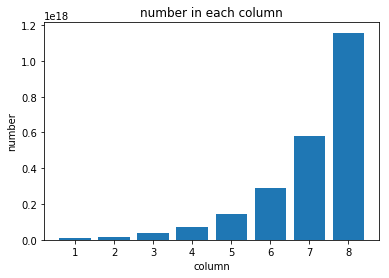

In [7]:
"""
8*8マスのチェス盤の小麦の合計を計算する。
sum()で配列の合計を算出する。

各列の平均を求める
axis というのを使う。axisは軸という意味。
列毎に何かが出来る

最後に棒グラフを作成する。
サンプルがあるので確認する。
np.arrangeとか
np.arrayとかの使い方を調査してみる

"""
# 小麦の合計計算
sum_ndarray = small_board_ndarray.sum() # 配列を合計
print("小麦の合計は{:.1e}です。".format(sum_ndarray))

# 各列の平均を求める
# print(small_board_ndarray.shape) # 配列の形を確認して64だった→8,8に変更
c_ndarray = small_board_ndarray.reshape(8,8) # reshapeを使って形を変更
# print(c_ndarray) # 形の変更状態を確認
mean_board_columns = c_ndarray.mean(axis=0)
print(mean_board_columns)

import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), mean_board_columns)
plt.show()


### 【問題4】小麦の数のヒートマップ

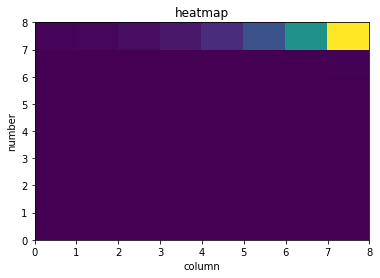

In [8]:
plt.xlabel("column")
plt.ylabel("number")
plt.title("heatmap")
plt.pcolor(c_ndarray)
plt.show()

### 【問題5】後半は前半の何倍か

In [9]:
count_before = 0
i = 0
for i in range(32):
#     print(i)
#     print(count_before)
    count_before += small_board_ndarray[i]
#     print(small_board_ndarray[i])
#     print(count_before)
#     print("0")
    
count_after = 0
i = 33
for i in range(32,64,1):
#     print(i)
    count_after += small_board_ndarray[i]
#     print(small_board_ndarray[i])
#     print(count_after)
    
print("前半の小麦の数は{}だ！！！".format(count_before))
print("後半の小麦の数は{}だ！！！".format(count_after))
how_time = count_after / count_before
print("だから！！！！！前半は後半の{}倍だ〜〜〜〜〜〜〜〜！！！o(｀ω´ )o".format(how_time))

前半の小麦の数は4294967295.0だ！！！
後半の小麦の数は1.8446744069414584e+19だ！！！
だから！！！！！前半は後半の4294967296.0倍だ〜〜〜〜〜〜〜〜！！！o(｀ω´ )o


### 【問題6】他の計算方法によるn×mマスへの拡張

問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。

それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

In [21]:
# np.append（）で作成
def small_board_append_count(n = 8, m = 8):
    n_squares = 64
    small_board_ndarray = np.array([1]).astype(np.uint64)
    print(small_board_ndarray)
    small_board_ndarray_count = 1
    # print(small_board_ndarray)
    print(small_board_ndarray_count)
    for _ in range(n_squares - 1):
        small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
        small_board_ndarray_count += small_board_ndarray[-1]
        #         print(small_board_ndarray)
    return small_board_ndarray,small_board_ndarray_count

gyou = 8
retu = 8
small_board_ndarray,small_board_ndarray_count = small_board_append_count(gyou,retu)

print("64マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))
print("64マスの板に小麦の数：{}".format(small_board_ndarray_count))

print(small_board_ndarray.dtype)

[1]
1
64マスの板に小麦を並べる（ndarray）：[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
 1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
 2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
 4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04
 6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
 1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06
 1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
 2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09
 4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
 6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11
 1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
 1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14
 2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
 4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16
 7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
 1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204

In [25]:
# ブロードキャストで作成
def small_board_bloadband_count(n = 8, m = 8):
    n_squares = 64
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    board_ndarray_sum = board_ndarray.sum()
    return board_ndarray,board_ndarray_sum

gyou = 8
retu = 8
board_ndarray,board_ndarray_sum = small_board_bloadband_count(gyou,retu)

print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # 9223372036854775808
print("小麦の合計：{}".format(board_ndarray_sum))


最後のマスの小麦の数：9223372036854775808
小麦の合計：18446744073709551615


### 【問題7】計算時間の比較

In [26]:
%%timeit
# timeit を使ってみる
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
c = a + b

2.59 µs ± 184 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
%%timeit
# np.append や ブロードキャストをしない方法
def count_komugi(n = 2, m = 2):
    n_squares = n * m # 盤の目の数は縦横の積
    small_board_list = [1] # 初めはリストで用意して、最初の番地には１を入れる
    small_board_count = 1 # 初めのカウントは１で用意して加算する用に用意
    for _ in range(n_squares - 1): # リストを最後の番地まで繰り返す
        small_board_list.append(2*small_board_list[-1]) # リストの最後の小麦の数を倍にして入れ込む
        small_board_count += 2*small_board_list[-1] # 合計値を出す
    small_board_ndarray = np.array(small_board_list) # リストをndarrayに変更する
    return small_board_count,small_board_ndarray # 算出した値を返す

gyou = 8
retu = 8
small_board_count,small_board_ndarray = count_komugi(gyou,retu) # 関数を呼び出して、値を取得
# print(small_board_ndarray.reshape(8,8))
# print("{} * {} マスのチェス盤の小麦の合計は{}です！！( ；∀；)".format(gyou,retu,small_board_count))
# # int にしてみる
# print("ちなみの盤の最後の小麦の数は{}です！！٩( ᐛ )و".format(small_board_ndarray[-1]))


24.7 µs ± 684 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [33]:
%%timeit
# np.append で作成
def small_board_append_count(n = 8, m = 8):
    n_squares = 64
    small_board_ndarray = np.array([1]).astype(np.uint64)
#     print(small_board_ndarray)
    small_board_ndarray_count = 1
    # print(small_board_ndarray)
#     print(small_board_ndarray_count)
    for _ in range(n_squares - 1):
        small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
        small_board_ndarray_count += small_board_ndarray[-1]
        #         print(small_board_ndarray)
    return small_board_ndarray,small_board_ndarray_count

gyou = 8
retu = 8
small_board_ndarray,small_board_ndarray_count = small_board_append_count(gyou,retu)

# print("64マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))
# print("64マスの板に小麦の数：{}".format(small_board_ndarray_count))

# print(small_board_ndarray.dtype)

290 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
%%timeit
# ブロードキャストで作成
def small_board_bloadband_count(n = 8, m = 8):
    n_squares = 64
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    board_ndarray_sum = board_ndarray.sum()
    return board_ndarray,board_ndarray_sum

gyou = 8
retu = 8
board_ndarray,board_ndarray_sum = small_board_bloadband_count(gyou,retu)

# print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # 9223372036854775808
# print("小麦の合計：{}".format(board_ndarray_sum))


5.17 µs ± 313 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 比較と考察
np.append() > npを使わない方法 > ブロードキャスト 
の順番で時間がかかっている事が分かった。
リストのappend より np.appendは時間が掛かっている。通常のappend より毎回numpy を使用しているからその分時間が掛かっているのかと考察。
また、ブロードキャストはappendを作成しないので毎回何かを作成する事がない。その分前者２つより処理速度が早くなっていると考察。このことより、リストの append より numpy の append の方が時間が掛かると考えられる。
